# Explore here

In [1]:
# Your code here

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")


In [3]:
df = df.drop_duplicates().reset_index(drop = True)


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df["sex_n"] = pd.factorize(df["sex"])[0]
df["region_n"] = pd.factorize(df["region"])[0]
num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])
df_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)
df_scal.head()


,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.043816


In [7]:
X = df_scal.drop("charges", axis = 1)
y = df_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)


In [9]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/train.csv", index = False)
X_test_sel.to_csv("../data/processed/test.csv", index = False)


In [10]:
train_data = pd.read_csv("../data/processed/train.csv")
test_data = pd.read_csv("../data/processed/test.csv")


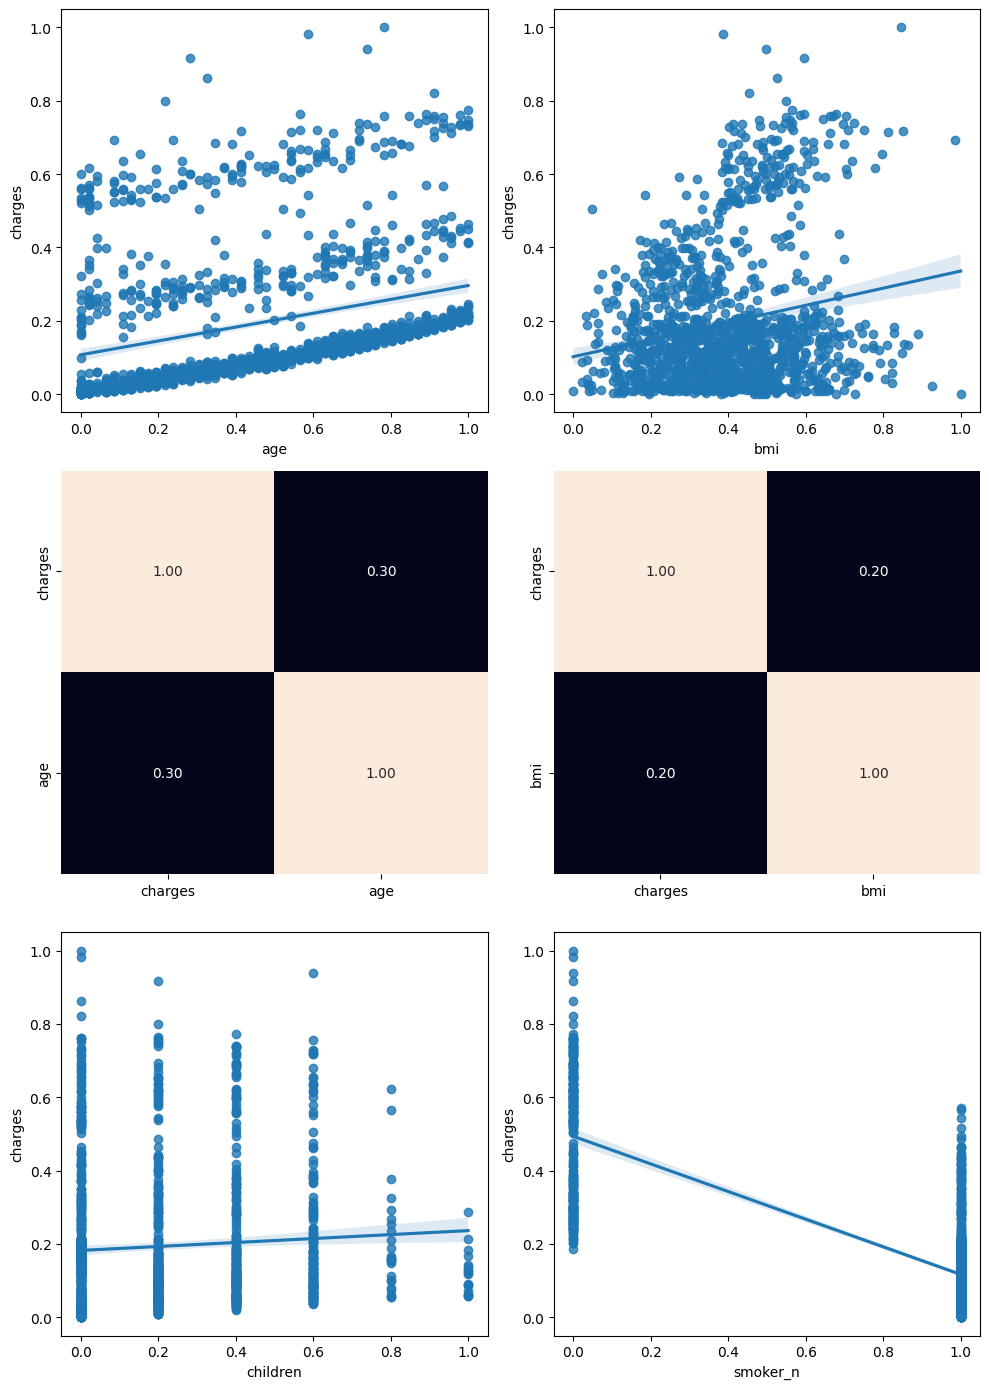

In [11]:
fig, axis = plt.subplots(3, 2, figsize = (10, 14))
total_data = pd.concat([train_data, test_data])

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])

sns.regplot(data = total_data, x = "smoker_n", y = "charges", ax = axis[2, 1])

plt.tight_layout()
plt.show()


In [12]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [21]:
model_intercept= model.intercept_
model_c= model.coef_

print("Intercep (a): " + str(model_intercept))
print("Coefficients (b1, b2): " + str(model_c))


Intercep (a): 0.3195827183308946
Coefficients (b1, b2): [ 0.1829699   0.18111814  0.04293572 -0.36780589]


In [23]:
y_pred = model.predict(X_test)

In [31]:
M_MSE= mean_squared_error(y_test, y_pred)
Score= r2_score(y_test, y_pred)

print("MSE: " + str(M_MSE))
print("R2 Score: " + str(Score))


MSE: 0.009150574110332004
R2 Score: 0.8045531086669286
